<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Modelos_de_Aprendizaje_Automatico-IMCA/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
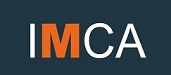


---


# CLASE: K-MEAS y K-MEAN SPECTRAL

In [68]:
# COMANDOS BASICOS PARA IMPLEMENTACION DE METODOS

#importacion de librerias necesarias
import numpy as np
import pandas as pd

dist=np.zeros((6,6))
print(dist)

rm=np.random.randint(low=0,high=10,size=(5,8))
print(rm)

means=rm[np.random.choice(5,size=3,replace=False),:]
print(means)

rm-means[2,:]

d=np.zeros((3,5))
print(d)

np.sum((rm-means[2,:])**2,axis=1)

np.sum((rm-means[1,:])**2,axis=1)

for j in range(3):
  d[j,:]=np.sum((rm-means[j,:])**2,axis=1)

print(d)

labels=np.argmin(d,axis=0)#argumento minimo por columna
print(labels)

rm

rm[labels==2,:]

np.mean(rm[labels==2,:],axis=0)

for j in range(3):
  means[j,:]=np.mean(rm[labels==j,:],axis=0)

print(means)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[6 9 0 2 2 1 1 2]
 [1 8 6 8 0 4 9 1]
 [4 7 9 7 7 1 6 8]
 [0 2 4 6 9 7 4 2]
 [0 3 6 1 0 5 2 9]]
[[0 3 6 1 0 5 2 9]
 [4 7 9 7 7 1 6 8]
 [6 9 0 2 2 1 1 2]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[179. 189. 159. 168.   0.]
 [200. 136.   0. 147. 159.]
 [  0. 176. 200. 211. 179.]]
[2 1 1 1 0]
[[0 3 6 1 0 5 2 9]
 [1 5 6 7 5 4 6 3]
 [6 9 0 2 2 1 1 2]]


In [92]:
# IMPLEMENTACION DEL METODO DE K-MEANS

#importacion de librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def kmeans(X,k,visualize=True,T=200):
  #k numero de cluster
  #n numero de datos
  n=X.shape[0]
  #Elegimos aleatoriamente los centroides iniciales
  means=X[np.random.choice(n,size=k,replace=False),:]
  #Inicializamos los siguientes arreglos
  dist=np.zeros((k,n))
  labels=np.zeros((n,))
  #Comenzamos la iteracion para el metodo k-medios
  num_changed=1 #si llega a 0, el algoritmo converge
  i=0 #contador
  while num_changed>0 and i<T:
      #Actualizamos los labels
      old_labels=labels.copy()#primero actualizamos los labels antiguos
      for j in range(k):
        dist[j,:]=np.sum((X-means[j,:])**2,axis=1)
        labels=np.argmin(dist,axis=0)
        num_changed=np.sum(labels!=old_labels) #si ningun valor de label ha cambiado, la suma sera 0
      #Actualizamos los centroides
      for j in range(k):
        means[j,:]=np.mean(X[labels==j,:],axis=0)
      i+=1
      #Visualizamos la convergencia (puntos rojos son los centroides)
      if visualize:
        print('Iteracion%d'%i)
        plt.scatter(X[:,0],X[:,1],c=labels) #c es los colores
        plt.scatter(means[:,0],means[:,1],c='r',marker='x')
        plt.pause(0.1)
  return labels

Iteracion1


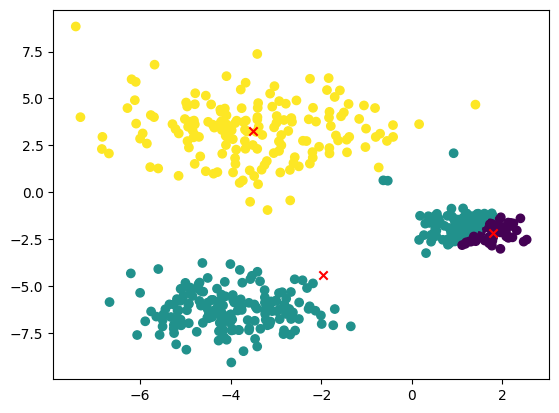

Iteracion2


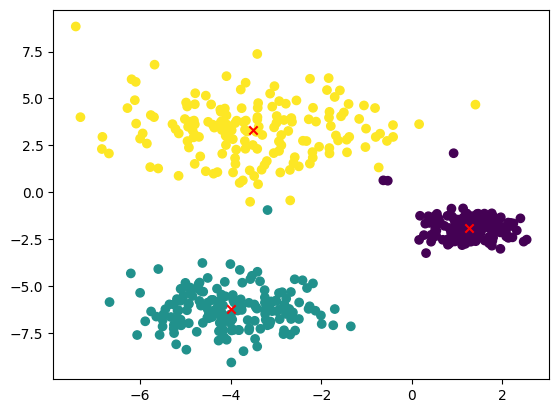

Iteracion3


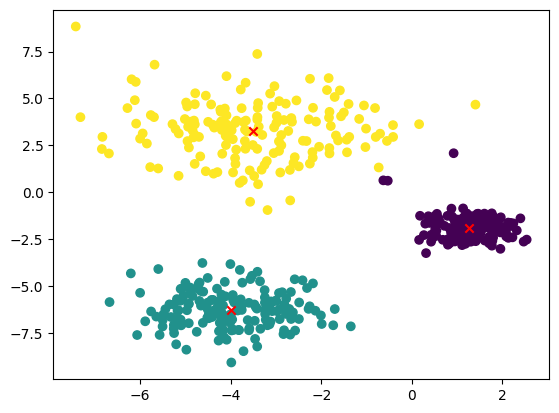

Iteracion4


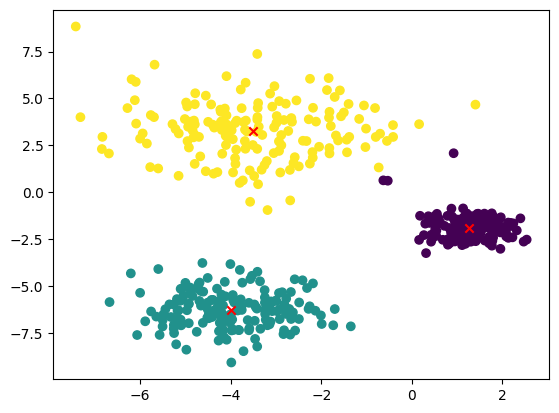

In [93]:
# USO DE KMEANS IMPLEMENTADO - EJEMPLO 1

#carga de datos de sklearn como nube de puntos suaves
import sklearn.datasets as datasets
n=500#numero de puntos a usar
X,L=datasets.make_blobs(n_samples=n,cluster_std=[1,1.5,0.5],random_state=60)
labels=kmeans(X,k=3)#A prioiri se pone 3 cluster, esto se deberia saber antes

#Nota: En este ejemplo el algoritmo de k-means converge, por
#la forma de la nube de datos

Iteracion1


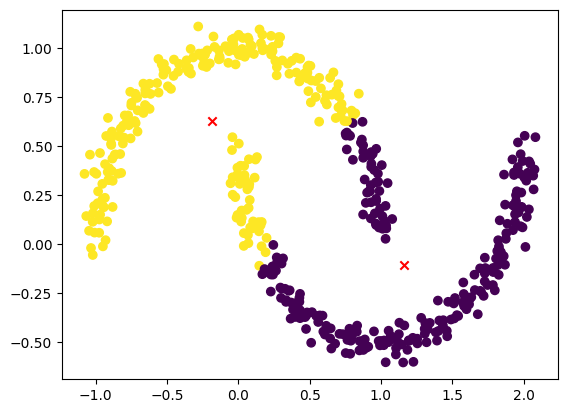

Iteracion2


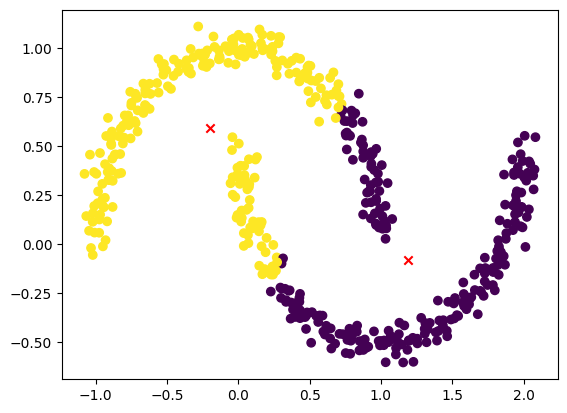

Iteracion3


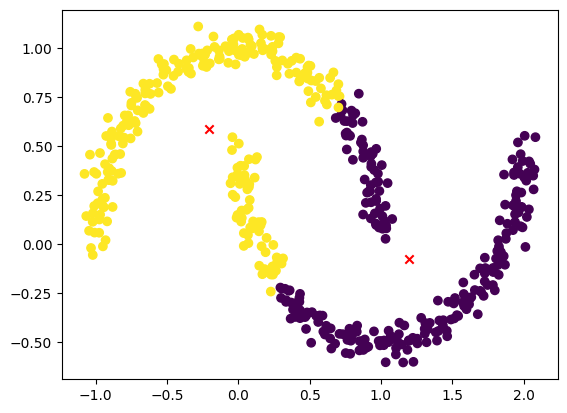

Iteracion4


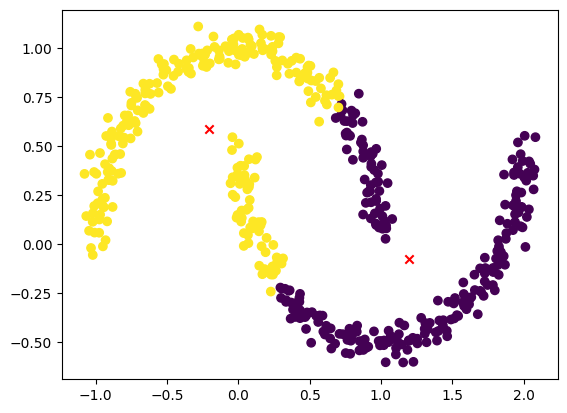

In [91]:
# USO DE KMEANS IMPLEMENTADO - EJEMPLO 2

#carga de datos de sklearn como nube en forma de luna
import sklearn.datasets as datasets
n=500#numero de puntos a usar
X,L=make_moons(n_samples=n,noise=0.05,random_state=42)
labels=kmeans(X,k=2)#A prioiri se pone 2 cluster

#Nota: En este ejemplo falla el metodo de k-means, por
#la forma de la nube de datos

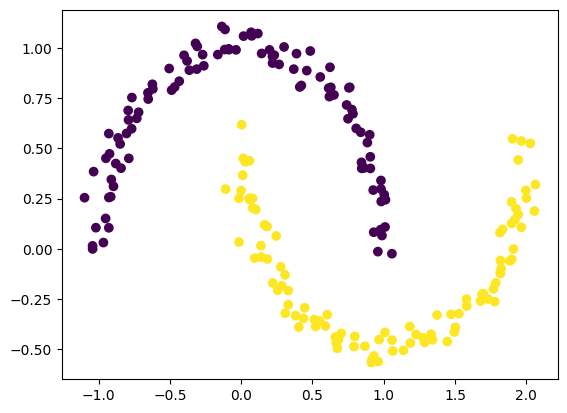

In [101]:
# NUBE DE PUNTOS EN FORMA DE MEDIA LUNA

#importacion de librerias
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
#construye la nube de puntos con 200 puntos en forma de luna
X,y=make_moons(n_samples=200,noise=0.05,random_state=42)
#ploteamos los puntos
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

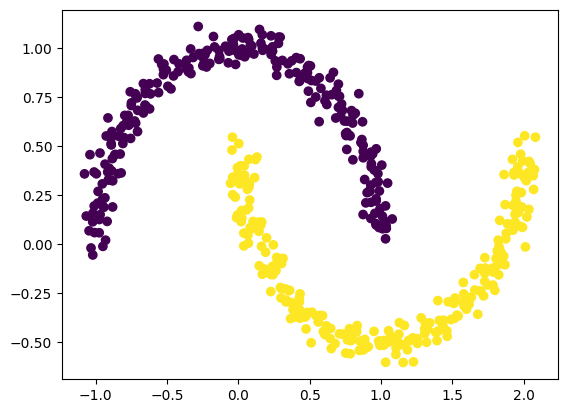

In [102]:
from enum import auto
from itertools import pairwise
from scipy.linalg import eigh

#n=500
#X,L=datasets.make_blobs(n_samples=n,cluster_std=[1,1.5,0.5],random_state=60)
X,y=make_moons(n_samples=500,noise=0.05,random_state=42)

def rbf_kernal(X,gamma):
  pairwise_sq_dist=np.sum((X[:,np.newaxis]-X[np.newaxis,:])**2,axis=2)
  return np.exp(-gamma*pairwise_sq_dist)
#calculamos la matriz de similitud
matriz_similitud=rbf_kernal(X,gamma=15)
matriz_grado=np.diag(np.sum(matriz_similitud,axis=1))
matriz_laplace=matriz_grado-matriz_similitud

#calculo de auvalores y autovectores
autovalores,autovectores=eigh(matriz_laplace)
k=2
autovectores_elegidos=autovectores[:,:k]

from sklearn.cluster import KMeans
#aplicamos el metodo de k-means
kmeans=KMeans(n_clusters=k)
kmeans.fit(autovectores_elegidos)
labels=kmeans.labels_
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

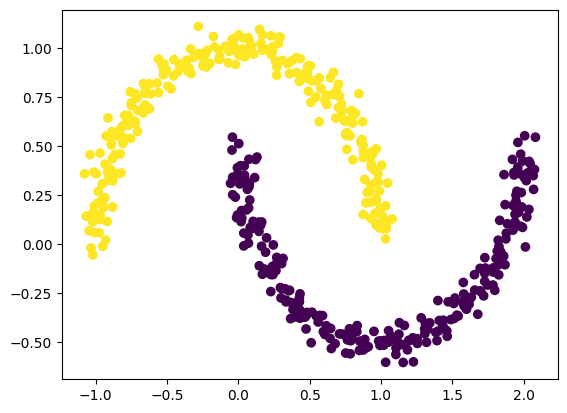

In [103]:
from enum import auto
from itertools import pairwise
from scipy.linalg import eigh

X,y=make_moons(n_samples=500,noise=0.05,random_state=42)
def rbf_kernal(X,gamma):
  pairwise_sq_dist=np.sum((X[:,np.newaxis]-X[np.newaxis,:])**2,axis=2)
  return np.exp(-gamma*pairwise_sq_dist)
#calculamos la matriz de similitud
matriz_similitud=rbf_kernal(X,gamma=15)
matriz_grado=np.diag(np.sum(matriz_similitud,axis=1))
matriz_laplace=matriz_grado-matriz_similitud

#calculo de auvalores y autovectores
autovalores,autovectores=eigh(matriz_laplace)
k=2
autovectores_elegidos=autovectores[:,:k]

from sklearn.cluster import KMeans
#aplicamos el metodo de k-means
kmeans=KMeans(n_clusters=k)
kmeans.fit(autovectores_elegidos)
labels=kmeans.labels_
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()
